# 09 Terminal locations

The default location for the terminals is on the left for both postive and negative busbars. This can be changed with the `terminals` argument of the `setup_circuit` function.

In [1]:
try:
    import liionpack as lp
except:
    !pip install -q git+https://github.com/pybamm-team/liionpack.git@main
    import liionpack as lp
import pybamm
import numpy as np
import matplotlib.pyplot as plt

Lets explore the options and draw the circuits

In [7]:
netlists = []
labels = ["left", "right", "left-right", "right-left", "middle"]
for label in labels:
    if label == "middle":
        terminals = [3,3]
    else:
        terminals = label
    netlist = lp.setup_circuit(Np=7, Ns=1, terminals=terminals)
    lp.draw_circuit(netlist, dpi=100, filename=f"../figures/terminals_{label}.pdf")
    netlists.append(netlist)

The terminal locations have a rather stark impact on the current distribution in the pack as will now be demonstrated.

In [9]:
outputs = []
for i, netlist in enumerate(netlists):
    param = pybamm.ParameterValues("Chen2020")
    experiment = pybamm.Experiment(
        [
            f"Discharge at 1 A for 1 minutes",
        ],
        period="10 seconds",
    )
    # Solve pack
    output = lp.solve(
        netlist=netlist,
        parameter_values=param,
        experiment=experiment,
        output_variables=None,
        initial_soc=0.5,
    )
    outputs.append(output)

Stepping simulation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 194.88it/s]


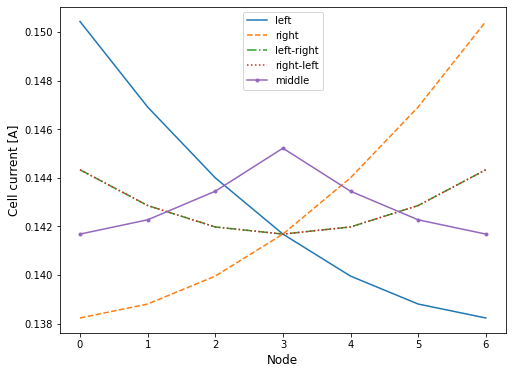

In [10]:
lines = ["-", "--", "-.", ":", ".-"]
with plt.rc_context(lp.lp_context("light")):
    fig, ax = plt.subplots(1, 1)
    for i, output in enumerate(outputs):
        plt.plot(range(7), output["Cell current [A]"][-1, :], lines[i], label=labels[i])
    ax.set_xlabel("Node")
    ax.set_ylabel("Cell current [A]")
    plt.legend()
    fig.savefig("../figures/terminal_locations.pdf")